In [226]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pytesseract
import easyocr

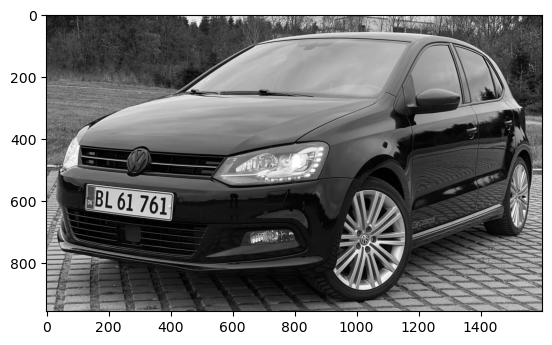

In [227]:
#Loads the image
img = cv2.imread('../images/polo.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

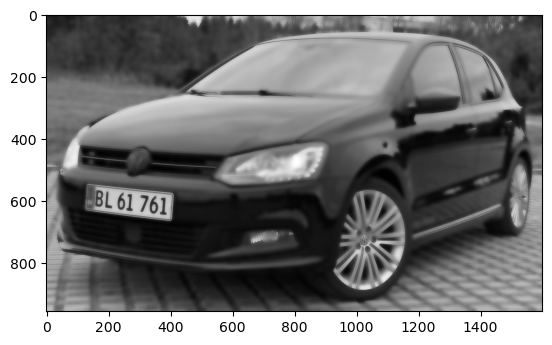

In [228]:
#Makes a noise reduction filter
noise_filter = cv2.bilateralFilter(gray, 20, 100, 100)
#Display image
plt.imshow(cv2.cvtColor(noise_filter, cv2.COLOR_BGR2RGB))

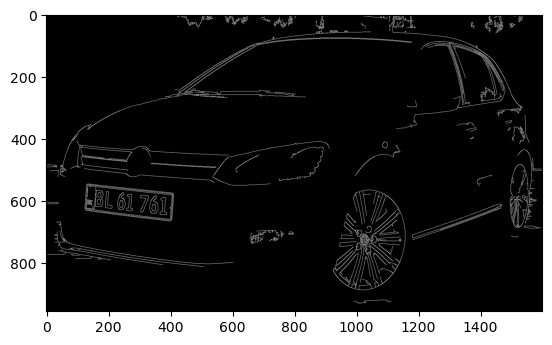

In [229]:
#Finds edges
edged_image = cv2.Canny(noise_filter, 50, 150, L2gradient =True)
#Display image
plt.imshow(cv2.cvtColor(edged_image, cv2.COLOR_BGR2RGB))

In [230]:
#Finds contours
contours,h = cv2.findContours(edged_image.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)  # Sort contours from big to small

In [231]:
numberplate = None
#Loops through contours 
for contour in contours:
    
    #Finds a rect shape contour with four sides
    approx = cv2.approxPolyDP(contour, 30, True)
    if len(approx) == 4:
        numberplate = approx
        break
numberplate

array([[[130, 550]],

       [[129, 631]],

       [[405, 661]],

       [[407, 575]]], dtype=int32)

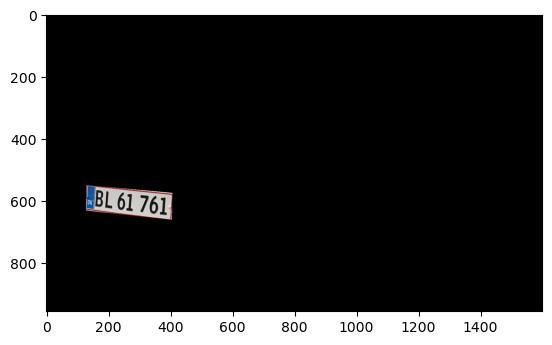

In [232]:
#Applies a mask that makes everything black except for the locations where the numberplate location is found
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [numberplate], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

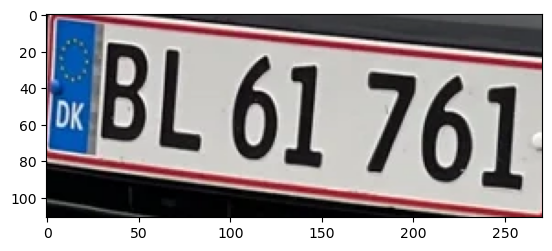

In [233]:
#Cropps the image using the mask so it finds the x1 and y1 where the numberplate starts and x2,y2 is the where it ends.
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = img[x1:x2, y1:y2-7]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [234]:
#Easy ocr to find the text in image
reader = easyocr.Reader(['da'],gpu=False)
result = reader.readtext(cropped_image, allowlist = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789',detail=0)
result

Using CPU. Note: This module is much faster with a GPU.


['DK', 'BL61761']

In [235]:
#If ocr finds more that one text it finds out if the text have a length of 7 and clean up spaces and [] in the words
text=""
try: 
    if len(result)>1:
        for item in result:
            word=item.replace(' ', '')
            if len(word)==7:
                text=word
    else:
        text=result[0].replace(' ', '')
        
except IndexError:
    print("Could not detect numberplate")
    
    
print(text)

BL61761
